# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0


url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("City not found.  Skipping...") 
        pass
        
print("Search complete!")

# Convert array of JSONs into Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

Processing record 1 of Set 1 | atuona
Processing record 2 of Set 1 | busselton
Processing record 3 of Set 1 | ushuaia
Processing record 4 of Set 1 | leningradskiy
Processing record 5 of Set 1 | sitka
Processing record 6 of Set 1 | omsukchan
City not found.  Skipping...
Processing record 7 of Set 1 | hermanus
Processing record 8 of Set 1 | okhotsk
Processing record 9 of Set 1 | hithadhoo
Processing record 10 of Set 1 | urusha
Processing record 11 of Set 1 | katsuura
Processing record 12 of Set 1 | georgetown
Processing record 13 of Set 1 | kapaa
Processing record 14 of Set 1 | cabedelo
Processing record 15 of Set 1 | sal rei
Processing record 16 of Set 1 | lata
Processing record 17 of Set 1 | chokurdakh
Processing record 18 of Set 1 | north platte
Processing record 19 of Set 1 | acapulco
Processing record 20 of Set 1 | esperance
Processing record 21 of Set 1 | saskylakh
Processing record 22 of Set 1 | albany
Processing record 23 of Set 1 | olafsvik
Processing record 24 of Set 1 | cochra

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data.to_csv(r'..\WeatherPy\my_weather_data.csv')
count = len(weather_data)
count


582

In [8]:
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,82.60,71,60,12.24,PF,1587060000
1,Busselton,-33.6500,115.3333,56.79,79,0,11.56,AU,1587060000
2,Ushuaia,-54.8000,-68.3000,56.21,53,99,6.78,AR,1587060000
3,Leningradskiy,69.3833,178.4167,13.68,95,100,9.44,RU,1587060000
4,Sitka,57.0531,-135.3300,44.96,90,98,4.03,US,1587060000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

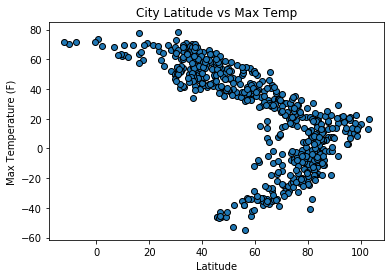

In [9]:
lat = weather_data["Latitude"]
temp = weather_data["Max Temp"]

plt.scatter(temp,lat, marker='o',edgecolors='black')
plt.title('City Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

#### Latitude vs. Humidity Plot

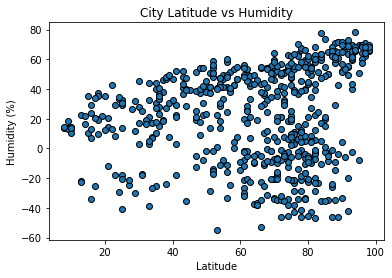

In [10]:
lat = weather_data["Latitude"]
hum = weather_data["Humidity"]

plt.scatter(hum,lat, marker='o',edgecolors='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()

#### Latitude vs. Cloudiness Plot

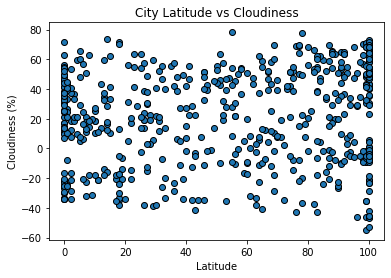

In [11]:
lat = weather_data["Latitude"]
cloud = weather_data["Cloudiness"]

plt.scatter(cloud,lat, marker='o',edgecolors='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

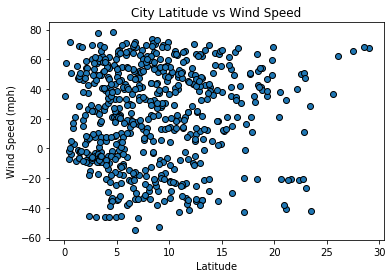

In [12]:
wind = weather_data["Wind Speed"]

plt.scatter(wind,lat, marker='o',edgecolors='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewind')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northHem_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southHem_df = weather_data.loc[weather_data["Latitude"] < 0,:]
southHem_df.head()
northHem_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Leningradskiy,69.3833,178.4167,13.68,95,100,9.44,RU,1587060000
4,Sitka,57.0531,-135.3300,44.96,90,98,4.03,US,1587060000
5,Omsukchan,62.5333,155.8000,9.77,88,100,3.58,RU,1587060000
7,Okhotsk,59.3833,143.3000,17.74,84,13,11.59,RU,1587060000
9,Urusha,54.0500,122.9000,32.92,74,0,2.06,RU,1587060000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8887206871105736


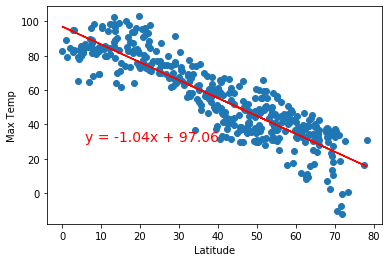

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northHem_df["Latitude"]
y_values = northHem_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northernHem')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7605796133897571


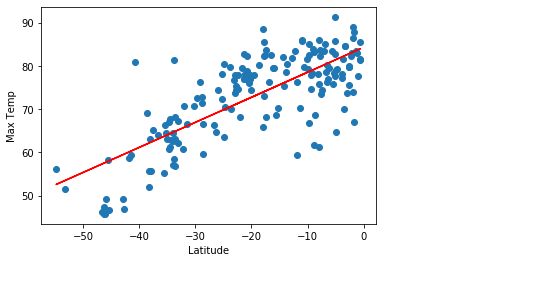

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southHem_df["Latitude"]
y_values = southHem_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southernHem')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5170218703570673


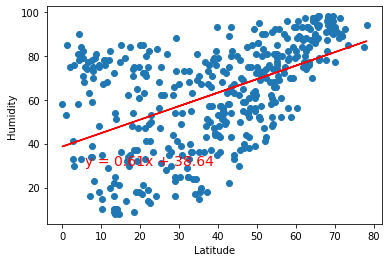

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northHem_df["Latitude"]
y_values = northHem_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernHum')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07700378381066139


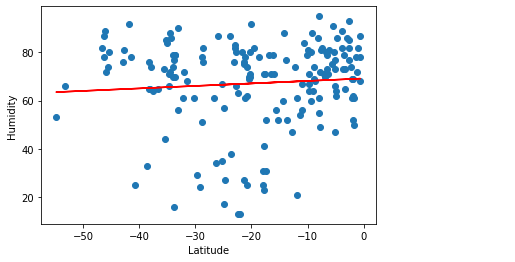

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southHem_df["Latitude"]
y_values = southHem_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernHum')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3336236687448347


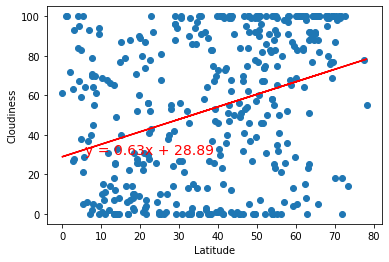

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northHem_df["Latitude"]
y_values = northHem_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northernCloud')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1990760095072535


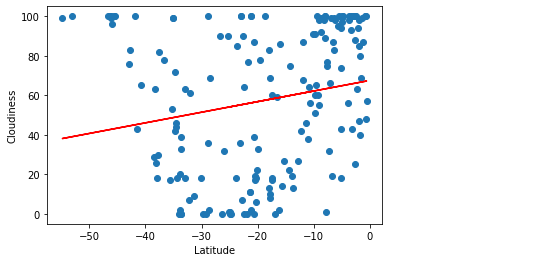

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southHem_df["Latitude"]
y_values = southHem_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southernCloud')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07721681361644943


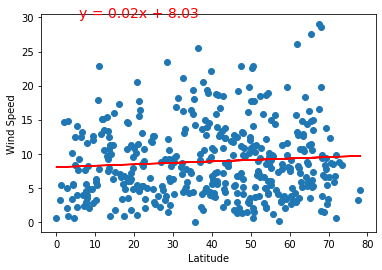

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = northHem_df["Latitude"]
y_values = northHem_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernWind')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.34823104334875243


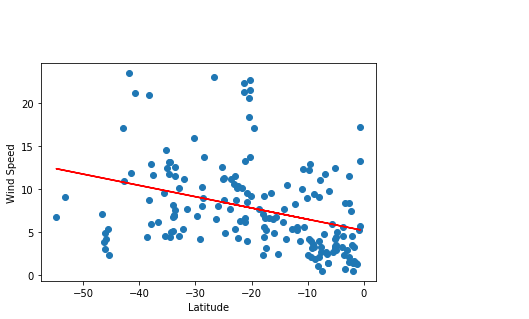

<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southHem_df["Latitude"]
y_values = southHem_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernWind')